# Notebook for first EDA Project "House Prices in King County"

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# for variable transformation
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

%matplotlib inline



# First Look into the Data

## Variable Overview

| Variable | Definition                                 | Key                                            | Type        |
|:----------|:--------------------------------------------|:------------------------------------------------|-------------|
| id | unique identified for a house                    |                                           | ordnial     |
| date       | house was sold                           |                                                | interval     |
| price     |      house price - to predict             |                                                | intervaal |
| bedrooms  | number of Bedrooms/House                  |                                                | ratio       |
| bathrooms | number of bathrooms/bedrooms              |                                                | ratio       |
| sqft_living   |       footage of the home             |                                                | ratio         |
| sqft_lot   |     footage of the lot                   |                                                | ratio     |
| floors    |   total floors (levels) in house          |                                                | ratio       |
|waterfront | object with waterfront view  |                                                | nominal     |
| view      |   object has been viewed                   |                                                |nominal |
|condition  |  how good the condition is ( Overall )    |                                                | ordinal  
| grade     |  overall grade given to the housing unit, based on King County grading system  |                                                | ordinal  
| sqft_above  | square footage of house apart from basement   |                                                | ratio  
| sqft_basement  | square footage of the basement        |                                                | ratio  
| yr_built  |    year the object was built                            |                                                | interval 
| yr_renovated  |  year when the object was renovated         |                                                | interval 
| zipcode  |      zip code                              |                                                | ordinal 
| lat      |    latitude coordinate                     |                                                | ratio 
| long     |    longitude coordinate                    |                                                | ratio 
| sqft_living15  |  square footage of interior housing living space for the nearest 15 neighbors   |                         | ratio 
| sqft_lot15  | square footage of the land lots of the nearest 15 neighbors |                                                | ratio 

## Import the data into a pandas dataframe

In [111]:
hp = pd.read_csv('King_County_House_prices_dataset.csv')
hp

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
2      5631500400   2/25/2015   180000.0         2       1.00          770   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
7      2008000270   1/15/2015   291850.0         3       1.50         1060   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
11     9212900260   5/27/2014   468000.0         2       1.00         1160   
12      114101516   5/28/2014   310000.0         3       1.00         1430   
13     6054650070   10/7/2014   400000.0         3       1.75         1370   
14     1175000570   3/12/2015   530000.0         5       2.00         1810   
15     9297300055   1/24/2015   650000.0         4       3.00         2950   
16     1875500060   7/31/2014   395000.0         3       2.00         1890   
17     6865200140   5/29/2014   485000.0         4       1.00         1600   
18       16000397   12/5/2014   189000.0         2       1.00         1200   
19     7983200060   4/24/2015   230000.0         3       1.00         1250   
20     6300500875   5/14/2014   385000.0         4       1.75         1620   
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
22     7137970340    7/3/2014   285000.0         5       2.50         2270   
23     8091400200   5/16/2014   252700.0         2       1.50         1070   
24     3814700200  11/20/2014   329000.0         3       2.25         2450   
25     1202000200   11/3/2014   233000.0         3       2.00         1710   
26     1794500383   6/26/2014   937000.0         3       1.75         2450   
27     3303700376   12/1/2014   667000.0         3       1.00         1400   
28     5101402488   6/24/2014   438000.0         3       1.75         1520   
29     1873100390    3/2/2015   719000.0         4       2.50         2570   
...           ...         ...        ...       ...        ...          ...   
21567  2025049203   6/10/2014   399950.0         2       1.00          710   
21568   952006823   12/2/2014   380000.0         3       2.50         1260   
21569  3832050760   8/28/2014   270000.0         3       2.50         1870   
21570  2767604724  10/15/2014   505000.0         2       2.50         1430   
21571  6632300207    3/5/2015   385000.0         3       2.50         1520   
21572  2767600688  11/13/2014   414500.0         2       1.50         1210   
21573  7570050450   9/10/2014   347500.0         3       2.50         2540   
21574  7430200100   5/14/2014  1220000.0         4       3.50         4910   
21575  4140940150   10/2/2014   572000.0         4       2.75         2770   
21576  1931300412   4/16/2015   475000.0         3       2.25         1190   
21577  8672200110   3/17/2015  1090000.0         5       3.75         4170   
21578  5087900040  10/17/2014   350000.0         4       2.75         2500   
21579  1972201967  10/31/2014   520000.0         2       2.25         1530   
21580  7502800100   8/13/2014   679950.0         5       2.75         3600   
21581   191100405   4/21/2015  1580000.0         4       3.25         3410   
21582  8956200760  10/13/2014   541800.0         4       2.50         3118   
21583  7202300110   9/15/2014   810000.0         4       3.00         3990   
21584   249000205  10/15/2014  1540000.0         5       3.75         4470   
21585  5100403806    4/7/2015   467000.0         3       2.50         1425   
21586   844000965   6/26/2014   22400

## Get a basic overview over the data

In [112]:
print("Number of rows and coloumns in the House Pricing data set: ", hp.shape)

Number of rows and coloumns in the House Pricing data set:  (21597, 21)


In [113]:
hp.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [114]:
hp.tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[5 rows x 21 columns]

In [115]:
hp.sample(10) #get a random sample from inbetween

id       date     price  bedrooms  bathrooms  sqft_living  \
14239  2193340120   6/4/2014  572000.0         3       2.25         1830   
13289  6669150790  7/31/2014  265000.0         3       2.25         1840   
11102   475000004   7/7/2014  536000.0         2       1.50         1130   
12678  4036100175  2/19/2015  689000.0         4       2.50         2440   
8373   1864940180   6/5/2014  335000.0         4       2.50         2610   
11198  4402700125  7/16/2014  382000.0         3       1.75         1790   
8713   3333500096   3/5/2015  625000.0         4       3.00         2350   
7552   3905100220  5/28/2014  535000.0         3       2.50         1720   
5093   1775930440  6/23/2014  479000.0         3       2.25         2110   
11917  6021501420  8/25/2014  571000.0         4       1.00         1350   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
14239      7897     1.0         0.0   0.0  ...      8        1290   
13289      6750     1.0         0.0   0.0  ...      7        1270   
11102       746     2.0         0.0   0.0  ...      8        1030   
12678     11700     1.0         0.0   0.0  ...      8        1480   
8373       4781     2.0         NaN   0.0  ...      8        2610   
11198      7679     1.0         0.0   0.0  ...      7        1790   
8713       5627     1.0         0.0   0.0  ...      8        1490   
7552       4006     2.0         0.0   0.0  ...      8        1720   
5093      11319     2.0         0.0   0.0  ...      8        2110   
11917      4000     1.5         NaN   0.0  ...      8        1350   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
14239          540.0     1986           0.0    98052  47.6914 -122.103   
13289          570.0     1980           0.0    98031  47.4075 -122.172   
11102          100.0     2009           0.0    98107  47.6684 -122.363   
12678          960.0     1961           0.0    98006  47.5606 -122.184   
8373             0.0     2009           0.0    98001  47.2649 -122.292   
11198            0.0     1953           0.0    98133  47.7442 -122.338   
8713           860.0     1960           0.0    98118  47.5514 -122.268   
7552             0.0     1994           0.0    98029  47.5690 -122.007   
5093             0.0     1978           0.0    98072  47.7420 -122.105   
11917            0.0     1930           0.0    98117  47.6885 -122.386   

       sqft_living15  sqft_lot15  
14239           1990        8306  
13289           1750        7004  
11102           1520        1519  
12678           2140       10807  
8373            2583        4796  
11198           1560        7680  
8713            2020        5627  
7552            1780        3974  
5093            1860       11319  
11917           1520        4000  

[10 rows x 21 columns]

## Data Types

In [116]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [117]:
hp['sqft_basement'] = pd.to_numeric(hp['sqft_basement'],errors='coerce')
hp.sqft_basement

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6           NaN
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18          NaN
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
          ...  
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581       NaN
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

In [118]:
type(hp.sqft_basement[1])

numpy.float64

## Basic Statistics 

In [119]:
hp.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21143.000000  21597.000000  17755.000000   
mean       7.657915   1788.596842     291.851724   1970.999676     83.636778   
std        1.173200    827.759761     442.498337     29.375234    399.946414   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# Missing Values

In [120]:
hp.isnull().sum() #im folgenden namen des datensatzes ändern, damit man die fehlenden werte noch sieht

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [121]:
missing = pd.DataFrame(hp.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/hp.shape[0]*100,1)
missing[missing.Number!=0]


Number  Percentage
waterfront       2376        11.0
view               63         0.3
sqft_basement     454         2.1
yr_renovated     3842        17.8

There are **2376 missing values** in *waterfront* and **3842 missing values** for the *renovation year* and **63 missing values** for *houseview*.

+ **waterfront** has 11 percent missing values
+ **view** has 0.3 percent missing values
+ **yr_renovated** has 17.8 percent missing values

In [122]:
hp.waterfront.nunique()

2

In [123]:
hp.waterfront.unique()

array([nan,  0.,  1.])

We can't ignore the waterfront variable since a lake view is considered a positive living aspect and might influence the house price. We cannot ignore the renovation year either, since this might indicate a higher value in old housings as well. 

In [124]:
hp.condition.unique()

array([3, 5, 4, 1, 2])

Inserting the mode for null-values:

In [125]:
hp['waterfront'] = hp['waterfront'].fillna(hp['waterfront'].mode()[0])
hp['view'] = hp['view'].fillna(hp['view'].mode()[0])
hp['yr_renovated'] = hp['yr_renovated'].fillna(hp['yr_renovated'].mode()[0])
hp['sqft_basement'] = hp['sqft_basement'].fillna(hp['sqft_basement'].mode()[0])

In [126]:
hp.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Feature Engineering

## Creating New Features

Adjusting data type of basement size *sqft_basement*:

In [127]:
type(hp.sqft_basement[1])

numpy.float64

Built new variable of the total size of real estate property *sqft_total_property* :

In [128]:
hp['sqft_total_property'] = hp['sqft_living']+ hp['sqft_lot'] + hp['sqft_basement']
hp.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...        1180            0.0   
1      7242     2.0         0.0   0.0  ...        2170          400.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   

   sqft_lot15  sqft_total_property  
0        5650               6830.0  
1        7639              10212.0  

[2 rows x 22 columns]

## Types of Variables

In [129]:
# find categorical variables
categorical = [var for var in hp.columns if hp[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


In [130]:
# find numerical variables
numerical = [var for var in hp.columns if hp[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 21 numerical variables


Numerical variables can be binary, continuous or discrete. A priori, it is good practice to know what each variable means, to then be able to differentiate continuous from discrete variables.

In [131]:
# let's visualise the values of the discrete variables

discrete = []
for var in numerical:
    if len(hp[var].unique())<20:
        print(var, ' values: ', hp[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

bedrooms  values:  [ 3  2  4  5  1  6  7  8  9 11 10 33]
floors  values:  [1.  2.  1.5 3.  2.5 3.5]
waterfront  values:  [0. 1.]
view  values:  [0. 3. 4. 2. 1.]
condition  values:  [3 5 4 1 2]
grade  values:  [ 7  6  8 11  9  5 10 12  4  3 13]
There are 6 discrete variables


grade, value, condition and waterfront are obviously categorical variables. We need to transform them. 

In [132]:
#transform discrete variable to categorical

cat_grade = hp.grade.astype('category')
type(cat_grade)


pandas.core.series.Series

In [133]:
#check if the encoding has worked
categorical = [var for var in hp.columns if hp[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


In [134]:
# first we make a list of continuous variables (from the numerical ones)
continuous = [var for var in numerical if var not in discrete and var not in ['id', 'price']]
continuous

['bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_total_property']

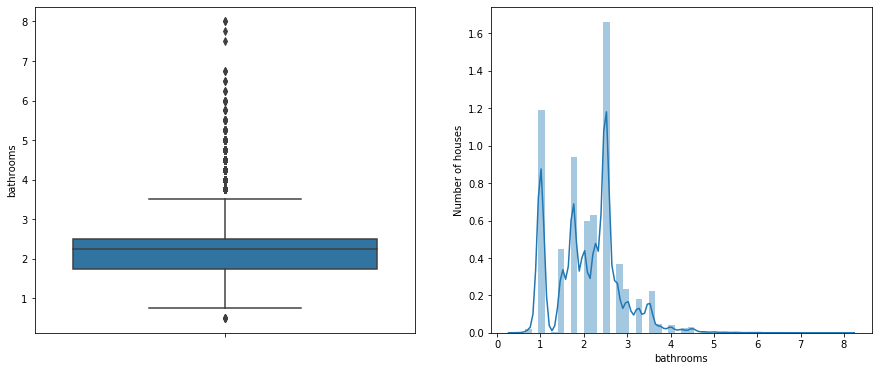

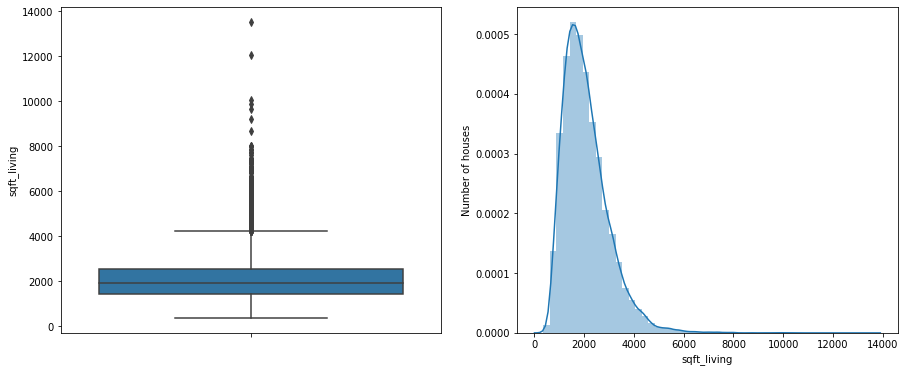

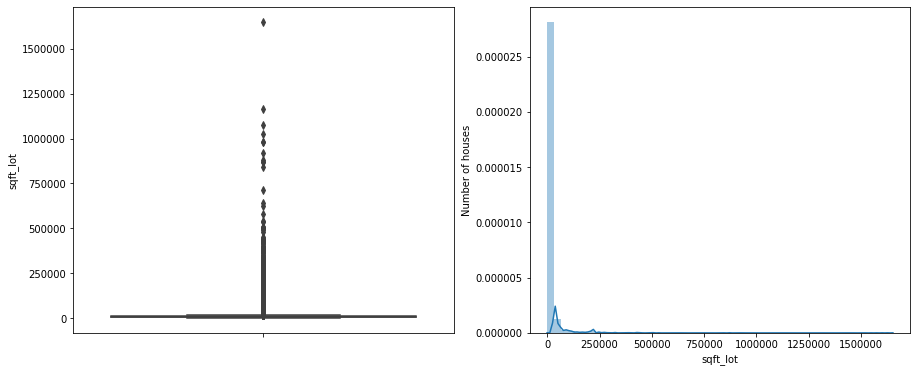

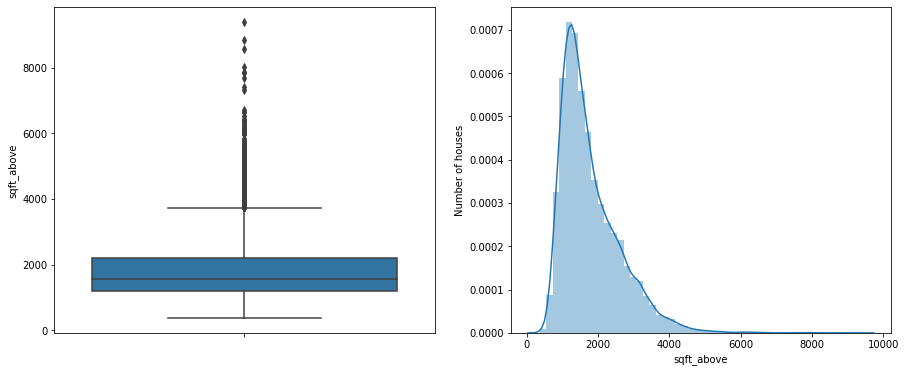

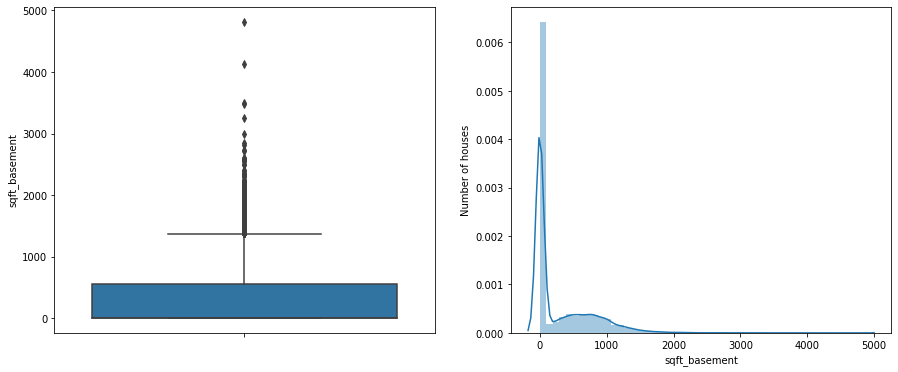

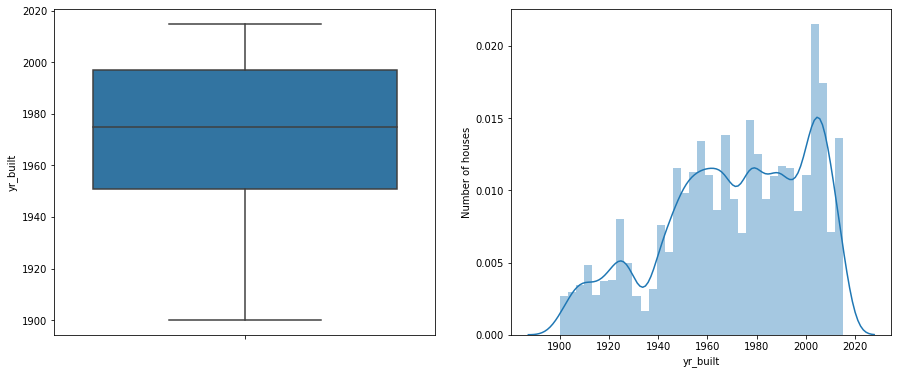

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


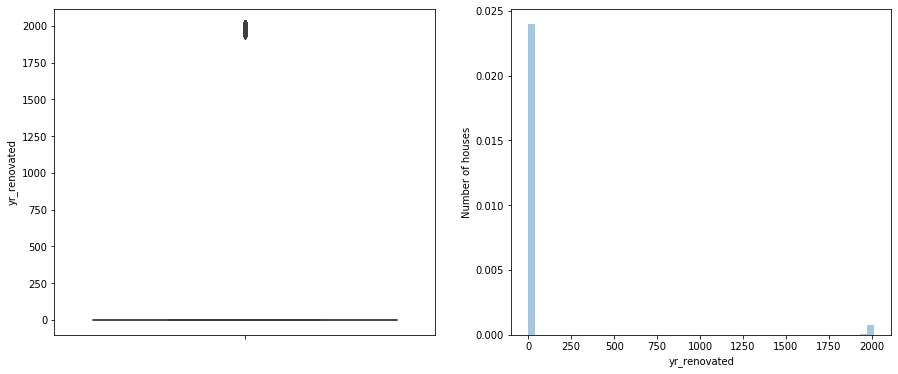

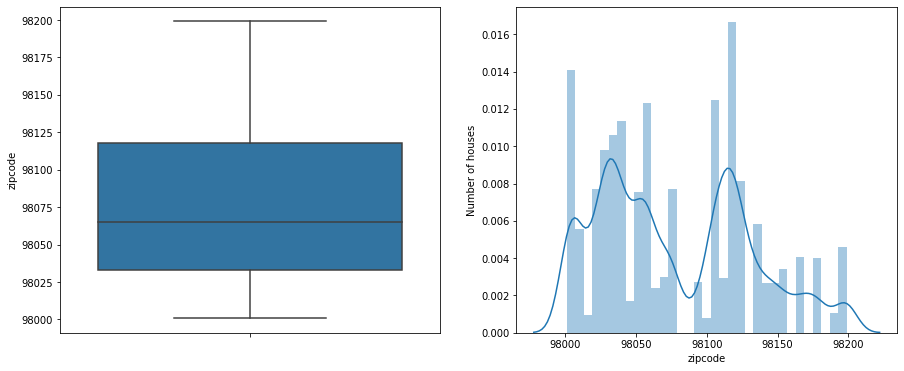

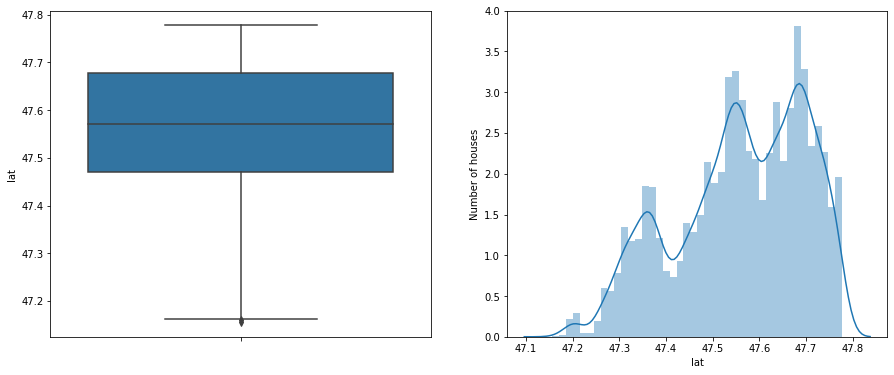

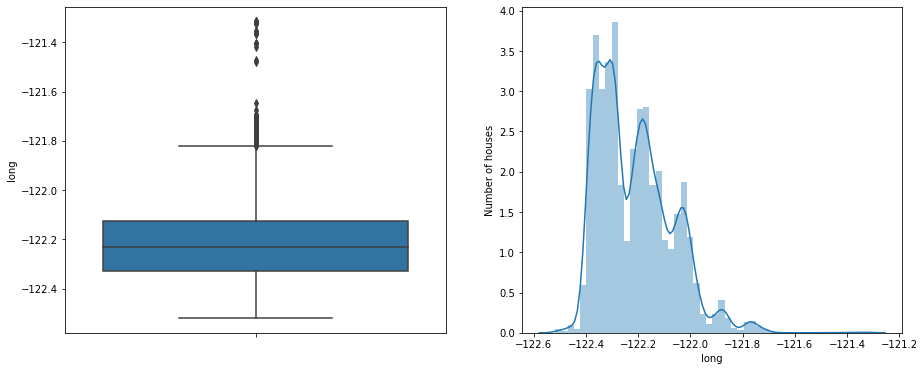

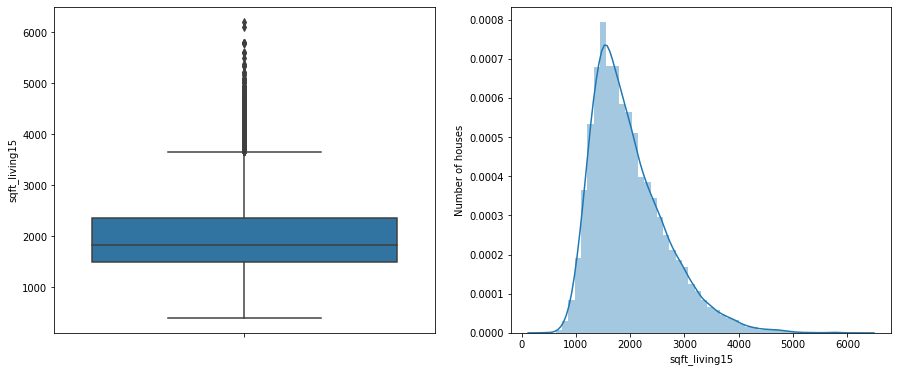

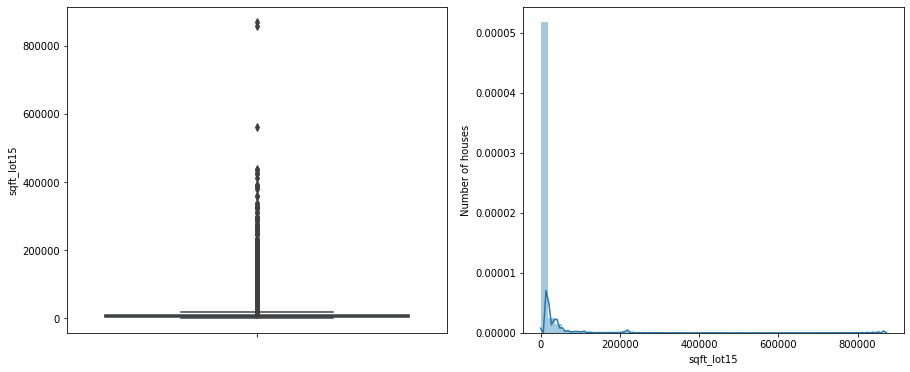

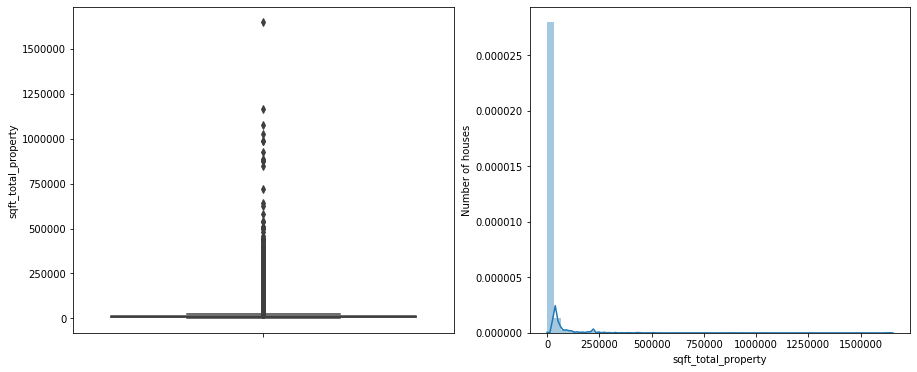

In [135]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=hp[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(hp[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

The variables are all left skewed and contain outliers.

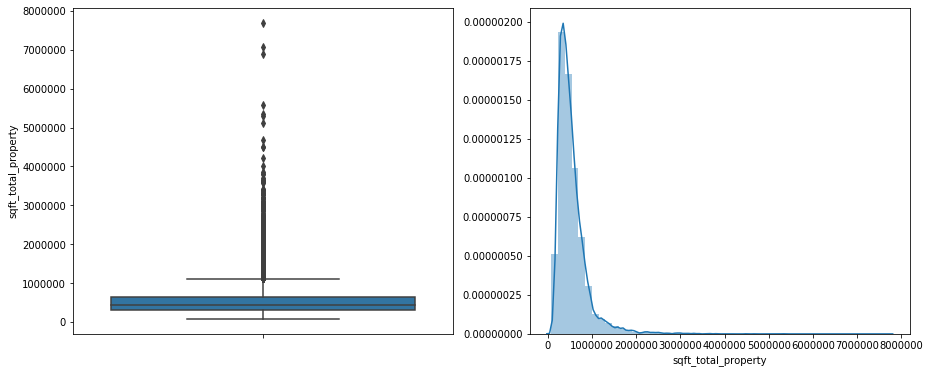

In [180]:
# let's look at the distribution of the target variable

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=hp['price'])
fig.set_title('')
fig.set_ylabel(var)

plt.subplot(1, 2, 2)
fig = sns.distplot(hp['price'].dropna()) #.hist(bins=20)
fig.set_ylabel('')
fig.set_xlabel(var)

plt.show()

In [137]:
#Let's now check if our categorical variables have a huge number of categories
for var in categorical:
    print(var, ' contains ', len(hp[var].unique()), ' labels')

date  contains  372  labels


The price variable is also left skewed and not normally distributed.

## Data Transformation

# Visual Exploration

FileNotFoundError: [Errno 2] No such file or directory: 'figures/pairplot.png'

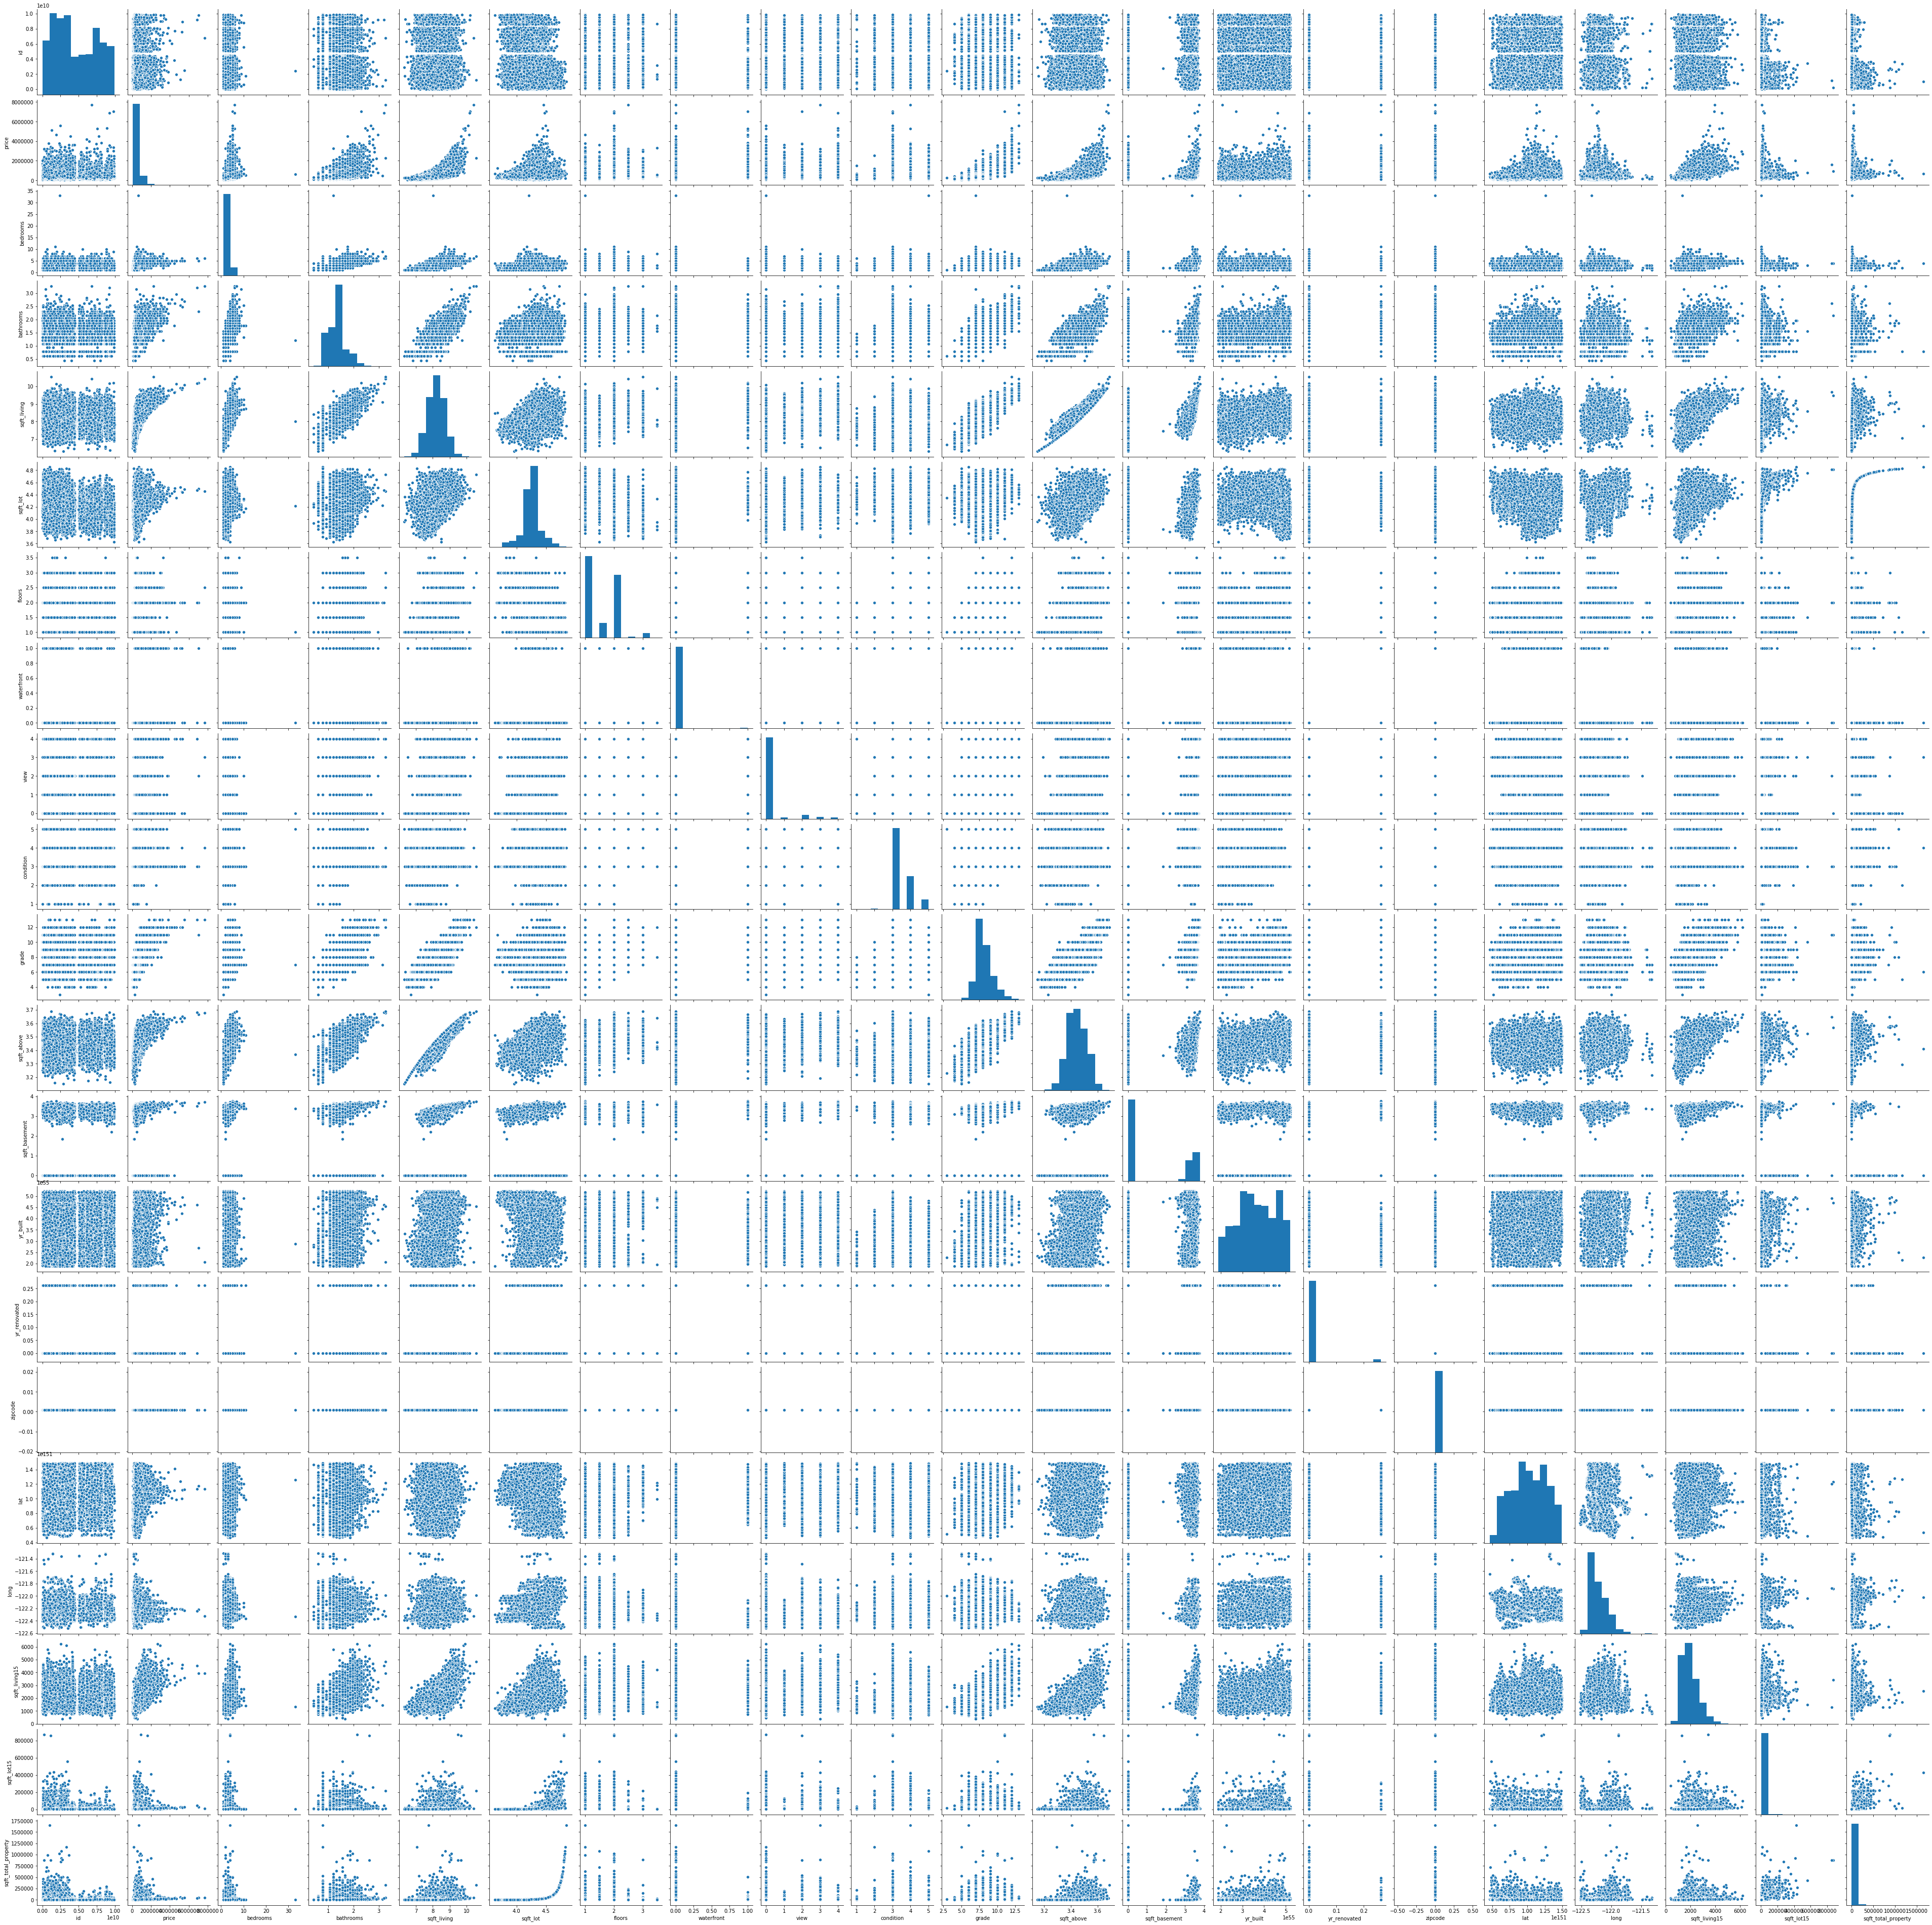

In [182]:
sns.pairplot(hp);
plt.savefig('figures/pairplot.png')

Pairplotting is of little use in this case.

## Heatmap

In [ ]:
del(hp['id'])
matrix = np.triu(hp.corr())
sns.heatmap(hp.corr(),
           mask=matrix,
           annot = True,
           fmt = '.1g',
           vmin=-1, 
           vmax=1, 
           center= 0,
           cmap= 'YlGnBu',
           linewidth=.1
           );


ax.set_ylim((0,70))



plt.savefig('figures/correlogram.png')


## Correlation Matrix

In [187]:
corr_matrix = hp.corr()
corr_matrix['price'].sort_values(ascending=False)

price                  1.000000e+00
grade                  6.679508e-01
sqft_living            6.141773e-01
sqft_living15          5.852412e-01
sqft_above             5.245778e-01
bathrooms              4.952083e-01
view                   3.934967e-01
bedrooms               3.087875e-01
waterfront             2.643063e-01
floors                 2.568035e-01
sqft_basement          1.906322e-01
sqft_lot               1.565375e-01
yr_renovated           1.175431e-01
sqft_total_property    1.083712e-01
sqft_lot15             8.284493e-02
yr_built               7.284793e-02
condition              3.605638e-02
long                   2.203632e-02
zipcode                8.118509e-15
lat                    0.000000e+00
id                    -1.677185e-02
Name: price, dtype: float64

In [ ]:
corr_matrix['grade'].sort_values(ascending=False)

## Histograms

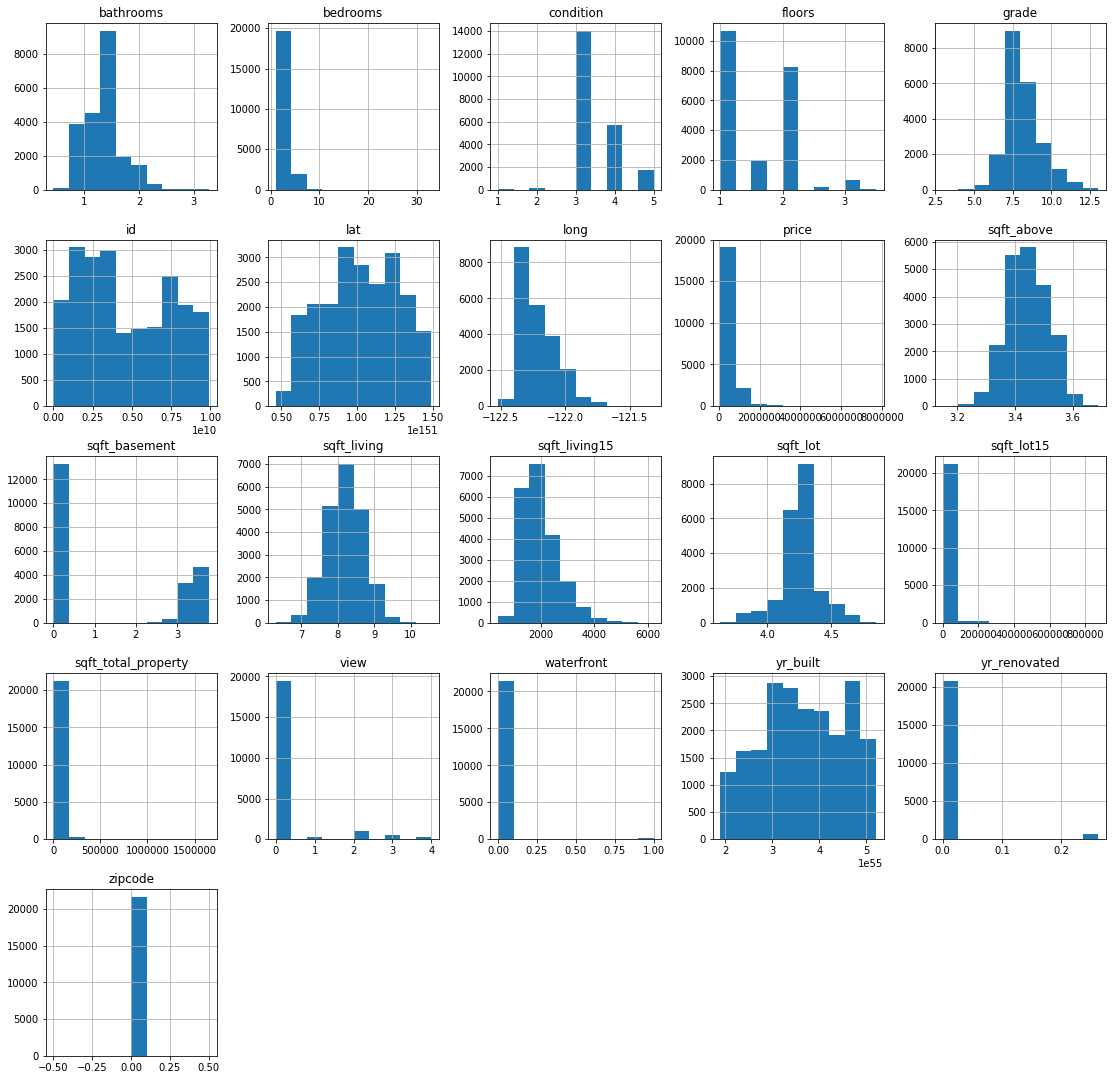

In [189]:
_ = hp.hist(figsize=(19,19))
#plt.savefig('figures/hist_all.png')

The amoung of houses with a waterfront view is very low. The same goes for houses that have been renovated. Consequently, we might use the mode for the missing values. 

## Scatterplots of the highest correlations

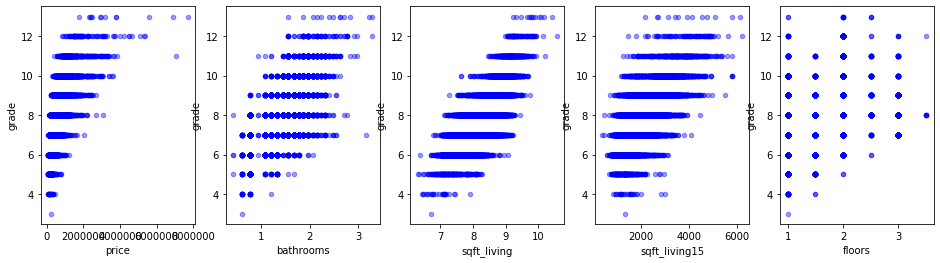

In [190]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

for xcol, ax in zip(
    ['price', 'bathrooms', 'sqft_living', 'sqft_living15', 'floors'], axes):
    hp.plot(kind='scatter', x=xcol, y='grade', ax=ax, alpha=0.4, color='b')

In [ ]:
#there are high quality houses that cost as much as some low quality houses. so what defines the price then?

In [191]:
hp[['bathrooms', 'floors']].nunique()

bathrooms    29
floors        6
dtype: int64

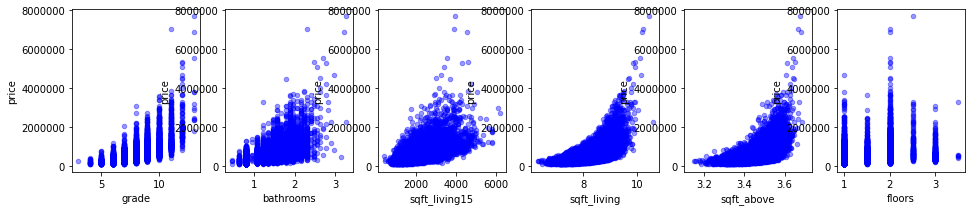

In [192]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16, 3))

for xcol, ax in zip([
        'grade', 'bathrooms', 'sqft_living15', 'sqft_living', 'sqft_above',
        'floors'], axes):
    hp.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [193]:
hp[['grade', 'floors']].nunique()

grade     11
floors     6
dtype: int64

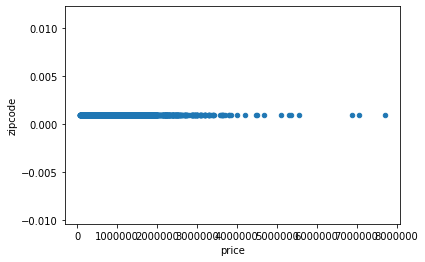

In [194]:
hp.plot(x='price', y='zipcode', kind='scatter')

## Boxplots

In [ ]:
sns.boxplot(data=hp, orient='h', palette='Set2'); 

In [ ]:
sns.boxplot(data=hp.price, orient='h', palette='Set2');

# Split Data

Split the data set:

In [161]:
X = hp.drop(['price', 'date'], axis = 1)
y = hp['price']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)
X_train.shape, X_test.shape

((15117, 20), (6480, 20))

Linear regression doesn't work on date data. 
Thus, we need to convert it into numerical value:

In [65]:
#import datetime as dt
#X['date'] = pd.to_datetime(X['date'])
#X['date']= X['date'].map(dt.datetime.toordinal)

In [163]:
X_train.head(2)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
3057  9477101280         3       1.75         2090      7505     1.0   
3935   263000164         2       1.00          830      6030     1.0   

      waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
3057         0.0   0.0          3      7        2090            0.0      1967   
3935         0.0   0.0          4      6         830            0.0      1925   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
3057           0.0    98034  47.7326 -122.194           1510        7416   
3935           0.0    98103  47.6994 -122.347           1280        6030   

      sqft_total_property  
3057               9595.0  
3935               6860.0

In [166]:
y_train.head(2)

3057    424950.0
3935    425000.0
Name: price, dtype: float64

# Select Features

Return only the selected features with p_values < 0.05 for the target variable 'price':

In [164]:
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train, X1)

lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features) > 0):
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=selected_features)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax > 0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break
print('The selected features for "price" are: ', selected_features)

The selected features for "price" are:  ['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_total_property']


Return selected features for grades:

In [44]:
X = X_train.drop(['grade', 'id'], axis = 1)
y = X_train['grade']

In [45]:
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train, X1)

lr = ols.fit()

selected_features = list(X_train.columns)
pmax = 1
while (len(selected_features) > 0):
    X_1 = X_train[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=selected_features)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax > 0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break
print('The selected features for "grade" are: ', selected_features)

The selected features for "grade" are:  ['id', 'sqft_living', 'sqft_lot', 'grade', 'sqft_basement', 'sqft_lot15', 'sqft_total_property']


# Linear Model Exploration

## Linear Model of 'price' with selected features

In [167]:
X4 = X_train[[
    'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition',
    'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
    'long', 'sqft_living15', 'sqft_lot15', 'sqft_total_property'
]]
X4 = sm.add_constant(X4)
y4 = y_train

X4.head(n=2)

const  bedrooms  bathrooms  sqft_lot  waterfront  view  condition  \
3057    1.0         3       1.75      7505         0.0   0.0          3   
3935    1.0         2       1.00      6030         0.0   0.0          4   

      grade  sqft_above  yr_built  yr_renovated  zipcode      lat     long  \
3057      7        2090      1967           0.0    98034  47.7326 -122.194   
3935      6         830      1925           0.0    98103  47.6994 -122.347   

      sqft_living15  sqft_lot15  sqft_total_property  
3057           1510        7416               9595.0  
3935           1280        6030               6860.0

In [168]:
sm.OLS(y4, X4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2164.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:11:22   Log-Likelihood:            -2.0643e+05
No. Observations:               15117   AIC:                         4.129e+05
Df Residuals:                   15100   BIC:                         4.130e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.661e+06   3.56e+06      2.154      0.031     6.9e+05    1.46e+07
bedrooms            -3.711e+04   2278.921    -16.283      0.000   -4.16e+04   -3.26e+04
bathrooms            4.146e+04   3834.794     10.810      0.000    3.39e+04     4.9e+04
sqft_lot              -77.7060      2.555    -30.412      0.000     -82.714     -72.698
waterfront           5.859e+05   2.15e+04     27.200      0.000    5.44e+05    6.28e+05
view                 5.653e+04   2578.750     21.920      0.000    5.15e+04    6.16e+04
condition            2.729e+04   2842.461      9.599      0.000    2.17e+04    3.29e+04
grade                9.497e+04   2630.053     36.110      0.000    8.98e+04       1e+05
sqft_above            111.0093      3.830     28.981      0.000     103.501     118.517
yr_built            -2562.8498     85.874    -29.844      0.000   -2731.174   -2394.525
yr_renovated           24.8815      4.917      5.060      0.000      15.243      34.520
zipcode              -615.2556     40.485    -15.197      0.000    -694.611    -535.900
lat                  6.189e+05   1.31e+04     47.205      0.000    5.93e+05    6.45e+05
long                 -2.26e+05   1.62e+04    -13.961      0.000   -2.58e+05   -1.94e+05
sqft_living15          21.5319      4.166      5.169      0.000      13.366      29.698
sqft_lot15             -0.3694      0.086     -4.316      0.000      -0.537      -0.202
sqft_total_property    77.7643      2.552     30.473      0.000      72.762      82.766
==============================================================================
Omnibus:                    13564.110   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1630634.701
Skew:                           3.840   Prob(JB):                         0.00
Kurtosis:                      53.297   Cond. No.                     2.20e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Remove variables with t<10.: 'bathrooms', 'condition', 'yr_renovated', 'sqft_living15', 'sqft_lot15'

# Scale Data

In [184]:
from sklearn.preprocessing import StandardScaler 
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(X_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

## Repeat Linear Model with Scaled Data

The R-squared improves after scaling the features:

In [185]:
X4 = X_train[[
    'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition',
    'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
    'long', 'sqft_living15', 'sqft_lot15', 'sqft_total_property'
]]
X4 = sm.add_constant(X4)
y4 = y_train

sm.OLS(y4, X4).fit().summary()

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2253.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:52:13   Log-Likelihood:            -2.0599e+05
No. Observations:               15117   AIC:                         4.120e+05
Df Residuals:                   15100   BIC:                         4.122e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.172e+06   3.43e+06      1.508      0.132   -1.55e+06    1.19e+07
bedrooms            -3.699e+04   2342.640    -15.789      0.000   -4.16e+04   -3.24e+04
bathrooms            4.734e+04   3769.934     12.556      0.000    3.99e+04    5.47e+04
sqft_lot              -73.5505      2.506    -29.347      0.000     -78.463     -68.638
waterfront           6.381e+05   2.15e+04     29.679      0.000    5.96e+05     6.8e+05
view                  5.21e+04   2523.110     20.649      0.000    4.72e+04     5.7e+04
condition            2.787e+04   2789.760      9.990      0.000    2.24e+04    3.33e+04
grade                1.013e+05   2563.346     39.531      0.000    9.63e+04    1.06e+05
sqft_above             96.8345      3.753     25.804      0.000      89.479     104.190
yr_built            -2676.8406     83.577    -32.029      0.000   -2840.661   -2513.020
yr_renovated           21.1981      4.758      4.456      0.000      11.872      30.524
zipcode              -555.8593     39.030    -14.242      0.000    -632.362    -479.356
lat                  5.835e+05   1.28e+04     45.616      0.000    5.58e+05    6.09e+05
long                -2.139e+05   1.55e+04    -13.777      0.000   -2.44e+05   -1.84e+05
sqft_living15          27.7104      4.101      6.757      0.000      19.671      35.749
sqft_lot15             -0.4205      0.086     -4.882      0.000      -0.589      -0.252
sqft_total_property    73.6415      2.504     29.415      0.000      68.734      78.549
==============================================================================
Omnibus:                    12294.536   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           971340.957
Skew:                           3.387   Prob(JB):                         0.00
Kurtosis:                      41.681   Cond. No.                     2.18e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [201]:
import statsmodels.formula.api as smf
rs = smf.ols(formula='price ~ grade', data=hp).fit().rsquared
f'{rs:.3}'

'0.446'

## LM of  'grade' with selected features

Im curious. What does the grading system do? How is it related to the evaluated variables?

In [ ]:
X = hp[[
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'sqft_above', 'yr_built', 'yr_renovated', 'lat',
    'long', 'sqft_living15', 'sqft_lot15'
]]
X = sm.add_constant(X)
y = hp.grade

X.head(n=2)

In [ ]:
sm.OLS(y, X).fit().summary()

Among the data, the King County grading system is strongly associated with the numbers of floors, bathrooms, squarefeet of living space, the squarfeet of living space in the closest 15 neighbors, as well as with the year the hous was built.

This regression has a R squared below 0.7 . It does not change by removing independent variables. 

On  *https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r* it says:

*BUILDING GRADE*
- Represents the construction quality of improvements. 
- Grades run from grade 1 to 13. Generally defined as:

**1-3** Falls short of minimum building standards. Normally cabin or inferior structure.

**4** Generally older, low quality construction. Does not meet code.

**5** Low construction costs and workmanship. **Small**, simple design.

**6** Lowest grade currently meeting building code. Low quality materials and simple designs.

**7** **Average grade of construction** and design. Commonly seen in plats and **older** sub-divisions.

**8** Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

**9** **Better architectural** design with extra interior and exterior design and quality.

**10** Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a **larger square footage**.

**11** Custom design and higher quality finish work with added amenities of solid woods, **bathroom fixtures and more luxurious options**.

**12** **Custom design and excellent builders**. All materials are of the highest quality and all conveniences are present.

**13** Generally custom designed and built. **Mansion level**. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [ ]:
# AcceptableRsquaredvalues=0.7to0.9
# price + highest corr with and withoug grade --> multiple regression (notebook 4)


# Visualisation